# USA unlikely to medal

## scaling no improvement

## Grid search used 

## Feature importnace had no effect

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, fbeta_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.dummy import DummyClassifier
import warnings


In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../../Combine_Data/men/sr_encoded.csv')
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_sr.csv')
srnames = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_srnames.csv')
srolymp = pd.read_csv('../../Data/cleandata22-23/men22_23.csv')

In [4]:
df['year'].fillna(2023, inplace=True)

# Base line using ZeroR

In [5]:

X = df.drop(columns=['medal'])  
y = df['medal']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9)

# Initialize  ZeroR classifier
zero_r_clf = DummyClassifier(strategy='most_frequent', random_state=42)

zero_r_clf.fit(X_train, y_train)

# Make predictions on  test data
y_pred = zero_r_clf.predict(X_test)

# Evaluate  model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("ZeroR Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


ZeroR Classifier
Accuracy: 0.9878
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       162
           1       0.00      0.00      0.00         2

    accuracy                           0.99       164
   macro avg       0.49      0.50      0.50       164
weighted avg       0.98      0.99      0.98       164

Confusion Matrix:
[[162   0]
 [  2   0]]


# Model Comparison


In [6]:
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
# CHANGED RANDOM STATE TO HAVE A LARGER NUMBER OF VALUES IN TEST DF
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
}

results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
        clf = make_pipeline(StandardScaler(), clf)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    beta = 2
    f2_score = fbeta_score(y_test, y_pred, beta=beta)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "f2_score": f2_score,
    }

for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F2-Score: {result['f2_score']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Classifier: Random Forest
Accuracy: 1.0000
F2-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00         2

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124

Confusion Matrix:
[[122   0]
 [  0   2]]

Classifier: AdaBoost
Accuracy: 0.9919
F2-Score: 0.9091
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       122
           1       0.67      1.00      0.80         2

    accuracy                           0.99       124
   macro avg       0.83      1.00      0.90       124
weighted avg       0.99      0.99      0.99       124

Confusion Matrix:
[[121   1]
 [  0   2]]

Classifier: SVM
Accuracy: 0.9839
F2-Score: 0.0000
Classification Report:
              precision    r

In [7]:
olymp.rename(columns={'D Score': 'D', 'E Score': 'E',
                     'Pen.': 'ND', 'nation': 'Nation'}, inplace=True)

In [8]:
olymp=olymp.drop(columns=['round_TeamFinal', 'round_AAfinal', 'round_TeamQual'])

# Feature Importance

Feature Importances:
Rank: 0.1706
D: 0.1751
E: 0.1445
ND: 0.0000
Total: 0.2772
year: 0.0343
Name: 0.0911
Nation: 0.0868
round_final: 0.0110
round_qual: 0.0094
Accuracy (Top 3): 0.9919
RandomForest Classifier
Accuracy: 0.9919
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       122
           1       0.67      1.00      0.80         2

    accuracy                           0.99       124
   macro avg       0.83      1.00      0.90       124
weighted avg       0.99      0.99      0.99       124

Confusion Matrix:
[[121   1]
 [  0   2]]


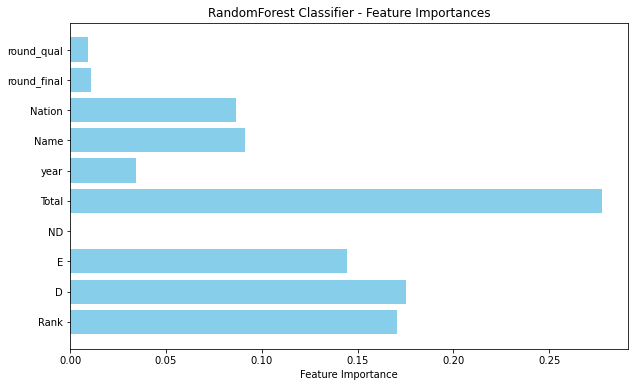

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have X_train, X_test, y_train, y_test already defined

# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances from the trained RandomForestClassifier
feature_importances = rf_model.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Make predictions with class probabilities
class_probs = rf_model.predict_proba(X_test)

# Define the number of top classes to select
top_n = 3

# Select the top N classes based on class probabilities
top_n_classes = np.argsort(class_probs, axis=1)[:, -top_n:]

# Set the minimum probability threshold
min_probability_threshold = 0.02

# Apply the threshold to select the top N classes
top_n_classes = top_n_classes[class_probs[np.arange(len(class_probs)), top_n_classes[:, -1]] >= min_probability_threshold]

# Evaluate the model's accuracy using the top N results
y_pred = top_n_classes[:, -1]  # Select the top prediction from the top N
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy (Top {top_n}): {accuracy:.4f}")

# Convert class labels to strings in y_test and y_pred
y_test_str = y_test.astype(str)
y_pred_str = y_pred.astype(str)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("RandomForest Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('RandomForest Classifier - Feature Importances')
plt.show()


# Modeling

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

y = df['medal']
X = df.drop(columns=['medal'])

# Convert class labels to strings
class_names = df['medal'].astype(str).unique()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=110)

# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with class probabilities
class_probs = rf_model.predict_proba(X_test)

# Define the number of top classes to select
top_n = 3

# Select the top N classes based on class probabilities
top_n_classes = np.argsort(class_probs, axis=1)[:, -top_n:]

# Set the minimum probability threshold
min_probability_threshold = 0.02

# Apply the threshold to select the top N classes
top_n_classes = top_n_classes[class_probs[np.arange(len(class_probs)), top_n_classes[:, -1]] >= min_probability_threshold]

# Evaluate the model's accuracy using the top N results
y_pred = top_n_classes[:, -1]  # Select the top prediction from the top N
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy (Top {top_n}): {accuracy:.4f}")

# Convert class labels to strings in y_test and y_pred
y_test_str = y_test.astype(str)
y_pred_str = y_pred.astype(str)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("AdaBoost Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy (Top 3): 0.9928
AdaBoost Classifier
Accuracy: 0.9928
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       137
           1       0.67      1.00      0.80         2

    accuracy                           0.99       139
   macro avg       0.83      1.00      0.90       139
weighted avg       1.00      0.99      0.99       139

Confusion Matrix:
[[136   1]
 [  0   2]]


In [11]:
class_probs = rf_model.predict_proba(olymp)

# Define the number of top classes to select
top_n = 20

# Select the top N classes based on class probabilities
top_n_classes = np.argsort(class_probs, axis=1)[:, -top_n:]

# Set the minimum probability threshold
min_probability_threshold = 0.1

# Apply the threshold to select the top N classes
top_n_classes = top_n_classes[class_probs[np.arange(len(class_probs)), top_n_classes[:, -1]] >= min_probability_threshold]

# Evaluate the model's accuracy using the top N results
y_pred = top_n_classes[:, -1]  # Select the top prediction from the top N

# Model Trained earlier, now using 2023/2022 data

In [12]:
ypreds  = pd.Series(y_pred)
olymp['ypred']=ypreds


In [13]:
olymp['ypred'].value_counts()

ypred
0    2305
1      14
Name: count, dtype: int64

In [14]:
filtered_df = olymp[olymp['ypred'] == 1]

In [15]:
filtered_df['Name'].unique()

array([ 10, 731, 732, 336])

# srnames used to match encoded names with actual names

In [16]:
name_encoded_values = [ 10, 731, 732, 336]

# Filter the DataFrame to get the corresponding "Name" values
result = srnames.loc[srnames['Name_encoded'].isin(name_encoded_values), 'Name']


In [17]:
result.unique()

array(['adem asil', 'xingyu lan', 'yang liu', 'jingyuan zou'],
      dtype=object)

# srolymp used to get country info from name list above

In [18]:
srolymp["Name"]=srolymp["Name"].str.lower()


In [19]:
names_to_filter =['adem asil', 'xingyu lan', 'yang liu', 'jingyuan zou']

# Filter the DataFrame to get rows with the specified "Name" values
result = srolymp[srolymp['Name'].isin(names_to_filter)]

In [20]:
result['Country'].value_counts()

Country
TUR    121
CHN     48
Name: count, dtype: int64